# Logistic Regression - Iris dataset classification
This notebook uses logistic regression to predict a flower's type using the iris dataset.

Logistic Regression is a statistical method used for binary classification tasks, modeling the probability of a binary outcome based on one or more predictor variables. It estimates the relationship between the dependent variable and independent variables using a logistic function, mapping predicted values to a range between 0 and 1. Unlike linear regression, which predicts continuous values, logistic regression outputs probabilities that can be thresholded to classify inputs into two distinct categories. It is widely used for its simplicity, efficiency, and interpretability, making it suitable for scenarios where a clear understanding of feature contributions and decision boundaries is essential.

## Notebook setup

The versions used in this project are detailed below:

Python = 3.12.6  

pandas = 2.2.3  
scikit-learn = 1.5.2

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

import warnings
# Suppress UserWarnings
warnings.filterwarnings('ignore', category=UserWarning)

## Data prep

In [2]:
# Load iris dataset
iris_data = pd.read_csv('Iris.csv')
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Split dataset into feature and target data using sepal length and width, and the petal length and width to predict a flower's class.

Feature data:
*  SepalLength
*  SepalWidth
*  PetalLength
*  PetalWidth

Target data:
*  Name

In [15]:
# Feature
iris_data_feature_data = iris_data[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
X = iris_data_feature_data

# Target
iris_data_target = iris_data[['Name']]
y = iris_data_target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Create model

In [5]:
# Create and fit model
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train,y_train)

/Users/jackwalker/anaconda3/envs/log-reg/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=200)

In [6]:
# Make predictions
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)  # Predicted probabilities for each class

## Model evaluation

In [7]:
import warnings
warnings.filterwarnings('ignore', message=".*does not have valid feature names.*")

In [8]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


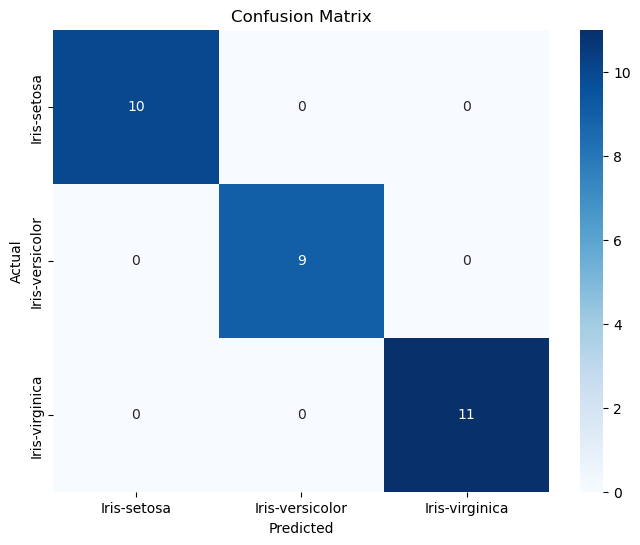

In [16]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
target_names = iris_data['Name'].unique()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Classification report
report = classification_report(y_test, y_pred, target_names=target_names)
print('Classification Report:')
print(report)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [18]:
# Log loss
log_loss_value = log_loss(y_test, y_proba)
print(f'Log Loss: {log_loss_value:.2f}')

Log Loss: 0.11


In [23]:
# Cross validation
cv_accuracy = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
print(f'Cross-validated Accuracy: {cv_accuracy.mean():.2f}')

Cross-validated Accuracy: 0.97


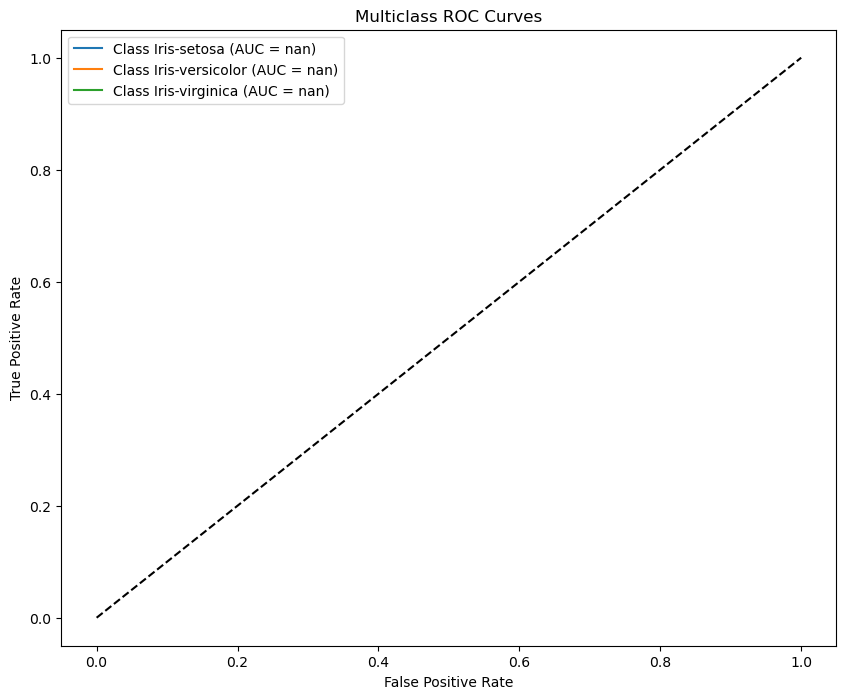

In [24]:
# Binarise the output (one-hot encoding for multi-class)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {target_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves')
plt.legend(loc='best')
plt.show()